# Metrics for clustring 
## Silhouette Score
> Measures how similar a data point is to its own cluster (cohesion) compared to other clusters (separation).
- Range: -1 to 1
  - Closer to 1: better clustering
  - Around 0: overlapping clusters
  - Negative: wrong clustering

$$

\huge {\text{Silhouette Score} = \frac{b - a}{\max(a, b)}}
$$

- $a$ is the average distance between a point and all other points in its cluster (cohesion)
  - average intra-cluster distance
- $b$ is the average distance between a point and all points in the next nearest cluster (separation)
  - average nearest-cluster distance

## Calinski-Harabasz Score (Variance Ratio Criterion)
> Ratio of between-cluster dispersion to within-cluster dispersion

- Higher is better

$$
\huge {CH = \frac{tr(B_k)}{tr(W_k)} . \frac{n-k}{k-1}}
$$

- $n$ number of samples
- $k$ number of clusters
- $tr()$ the trace of a square matrix is the sum of its diagonal elements.
  - $tr(A)=\sum_{i=1}^{n} A_{ii}$
- $tr(B_k) trace of between-group dispersion matrix
  - total inter-cluster variance
  - Between-cluster scatter matrix $B_k$ how far cluster centroids are from the overall mean
- $tr(W_k) trace of within-group dispersion matrix
  - total intra-cluster variance
  - Within-cluster scatter matrix $W_k$ how compact the data is around its own cluster center
- Which means: higher between-cluster variance and lower within-cluster variance → better clusters.

## Within-Cluster Sum of Squares (WCSS)
> Measures the total sum of squared distances of each point to its cluster centroid.

## Davies-Bouldin Index
## Adjusted Rand Index (ARI)
## Mutual Information (MI)


- https://www.geeksforgeeks.org/clustering-metrics/
- https://scikit-learn.org/stable/modules/clustering.html
- 
and others...

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score

In [2]:
pro_data_mall = pd.read_csv('../Processed_datasets/mall_customer_segmentation/processed_data.csv')
pro_data_mall.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender
0,-1.424569,-1.738999,-0.434801,1
1,-1.281035,-1.738999,1.195704,1
2,-1.352802,-1.700830,-1.715913,0
3,-1.137502,-1.700830,1.040418,0
4,-0.563369,-1.662660,-0.395980,0


In [3]:
pro_data_mall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     200 non-null    float64
 1   Annual Income (k$)      200 non-null    float64
 2   Spending Score (1-100)  200 non-null    float64
 3   Gender                  200 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 6.4 KB


In [10]:
auto_data_train = pd.read_csv('../Processed_datasets/utomobile_customer_segmentation/train_processed_data.csv')
auto_data_test = pd.read_csv('../Processed_datasets/utomobile_customer_segmentation/test_processed_data.csv')
display("Training set", auto_data_train.head())
display(auto_data_train.info())
display("Testing set", auto_data_test.head())  
display(auto_data_test.info())

'Training set'

,Age,Work_Experience,Family_Size,Gender,Ever_Married,Graduated,Profession,Spending_Score,Var_1,Segmentation
0,-1.284623,-0.499892,0.757947,1,0,0,5,2,3,3
1,-0.327151,0.537954,0.096095,0,1,1,2,0,3,0
2,1.408268,-0.499892,-1.227610,0,1,1,2,2,5,1
3,1.408268,-0.805141,-0.565758,1,1,1,7,1,5,1
4,-0.207467,1.453700,2.081652,0,1,1,3,1,5,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              8068 non-null   float64
 1   Work_Experience  8068 non-null   float64
 2   Family_Size      8068 non-null   float64
 3   Gender           8068 non-null   int64  
 4   Ever_Married     8068 non-null   int64  
 5   Graduated        8068 non-null   int64  
 6   Profession       8068 non-null   int64  
 7   Spending_Score   8068 non-null   int64  
 8   Var_1            8068 non-null   int64  
 9   Segmentation     8068 non-null   int64  
dtypes: float64(3), int64(7)
memory usage: 630.4 KB


None

'Testing set'

,Age,Work_Experience,Family_Size,Gender,Ever_Married,Graduated,Profession,Spending_Score,Var_1
0,-0.450948,-0.792867,-1.196222,0,1,1,2,2,5
1,-0.391999,1.696957,0.767498,1,1,1,5,0,5
2,1.494372,-0.792867,-1.196222,0,1,0,0,2,5
3,0.904881,2.630641,-0.541649,1,1,0,4,1,5
4,-1.453083,-0.045920,0.767498,0,0,0,8,2,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              2627 non-null   float64
 1   Work_Experience  2627 non-null   float64
 2   Family_Size      2627 non-null   float64
 3   Gender           2627 non-null   int64  
 4   Ever_Married     2627 non-null   int64  
 5   Graduated        2627 non-null   int64  
 6   Profession       2627 non-null   int64  
 7   Spending_Score   2627 non-null   int64  
 8   Var_1            2627 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 184.8 KB


None

In [4]:
import warnings
# Silence warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

Inertia:  [438.52241155677746, 344.405428869535, 254.28290726083478, 216.7849015165104, 181.9514362434146, 164.77658348793943, 153.1195442545863, 142.21262833357423, 132.60985315269122]
Silhouette Score:  [0.30319765641607566, 0.3142800845203407, 0.3502702043465398, 0.34977050035201074, 0.356485834425401, 0.3346555570188711, 0.3367567190885339, 0.332448045759479, 0.3142584256734506]
Calinski Harabasz Score:  [95.16047848869201, 87.19416925256019, 101.4872647305155, 97.25832335913094, 99.65487851108833, 94.58176379136616, 88.87808912112808, 85.1276967481362, 82.25241653294354]


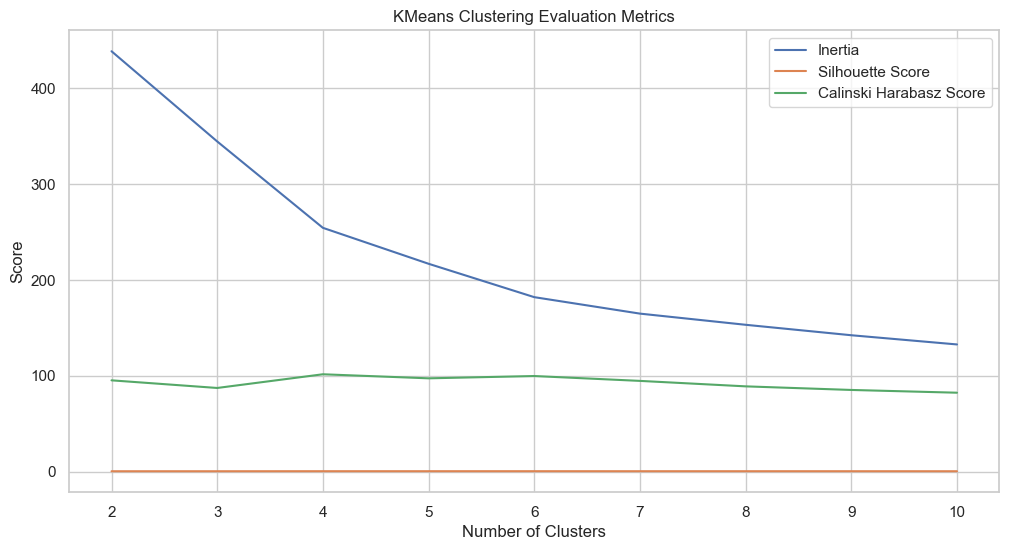

In [5]:
# inttialization
kmeans_models = [KMeans(n_clusters=k, random_state=42) for k in range(2, 11)] 
# fit the models
X = pro_data_mall.copy()
kmeans_models = [model.fit(X) for model in kmeans_models] 
# get the labels
kmeans_labels = [model.labels_ for model in kmeans_models]
# get the inertia (WCSS)
kmeans_inertia = [model.inertia_ for model in kmeans_models]
# get the silhouette score
kmeans_silhouette = [silhouette_score(X, labels) for labels in kmeans_labels]
# get the calinski harabasz score
kmeans_calinski = [calinski_harabasz_score(X, labels) for labels in kmeans_labels]

# print the results
print("Inertia: ", kmeans_inertia)
print("Silhouette Score: ", kmeans_silhouette)
print("Calinski Harabasz Score: ", kmeans_calinski)
# plot the results
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
plt.plot(kmeans_inertia, label='Inertia')
plt.plot(kmeans_silhouette, label='Silhouette Score')
plt.plot(kmeans_calinski, label='Calinski Harabasz Score')
plt.title('KMeans Clustering Evaluation Metrics')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.xticks(range(0, 9), range(2, 11))
plt.legend()
plt.show()



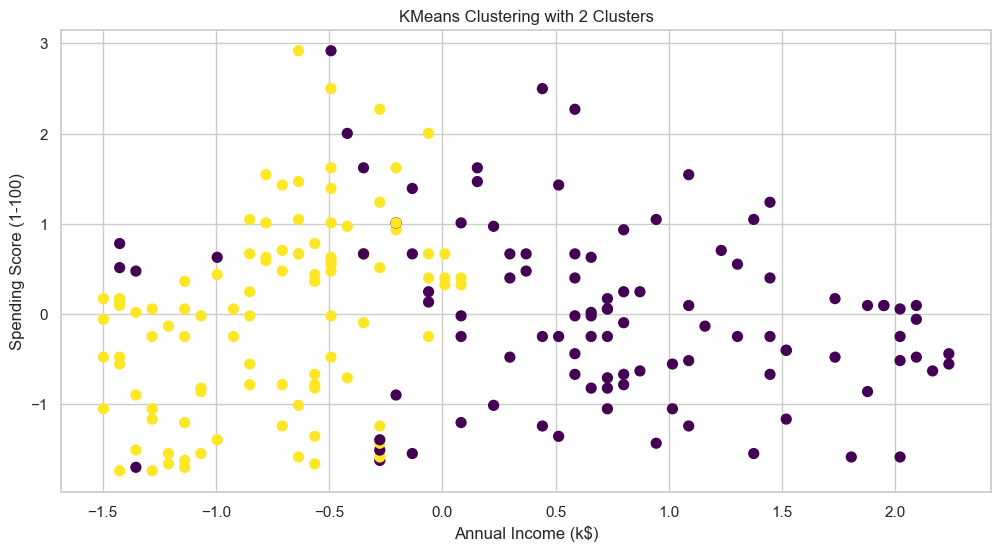

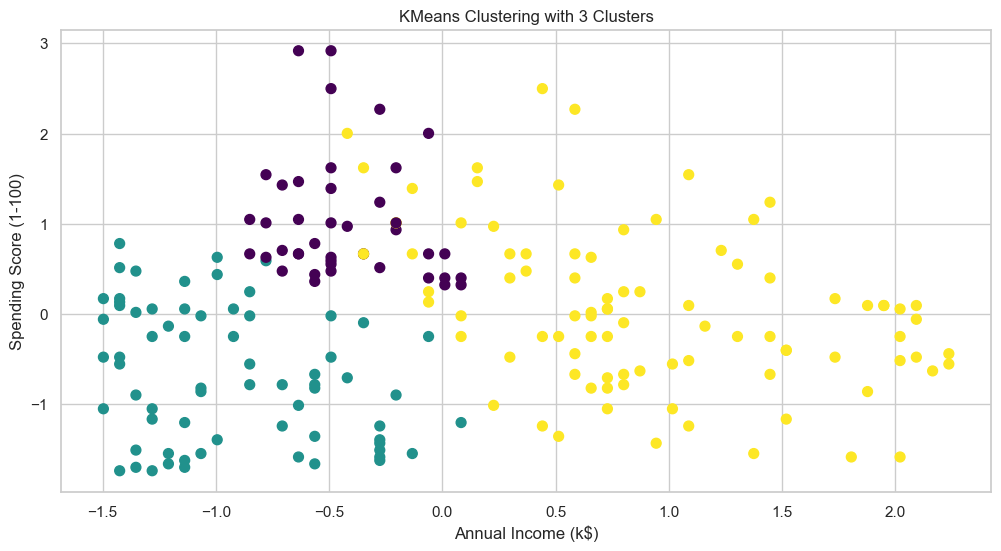

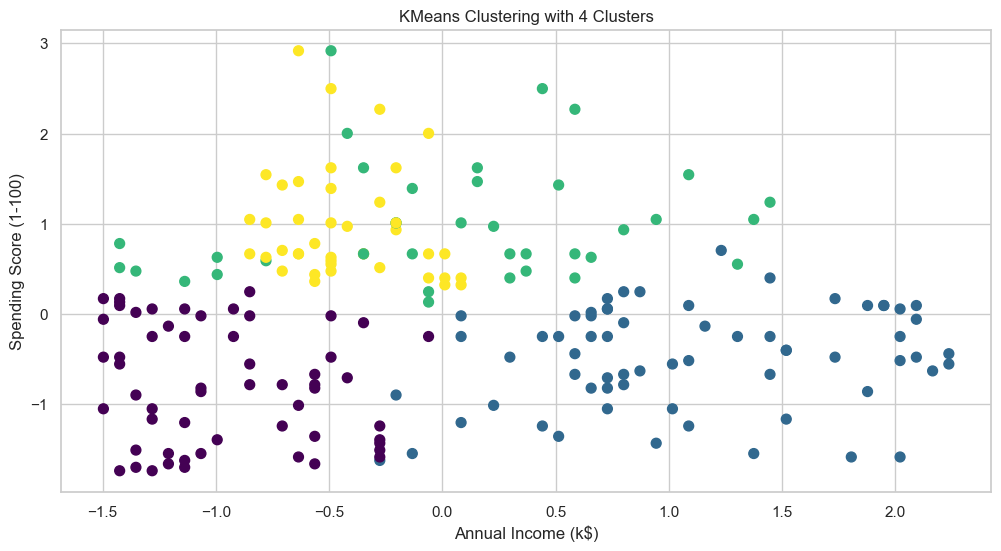

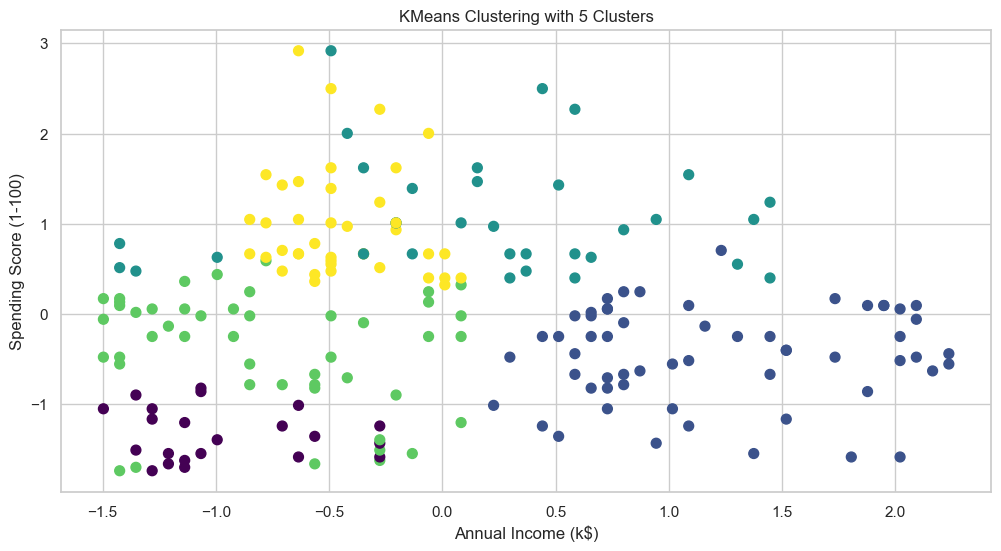

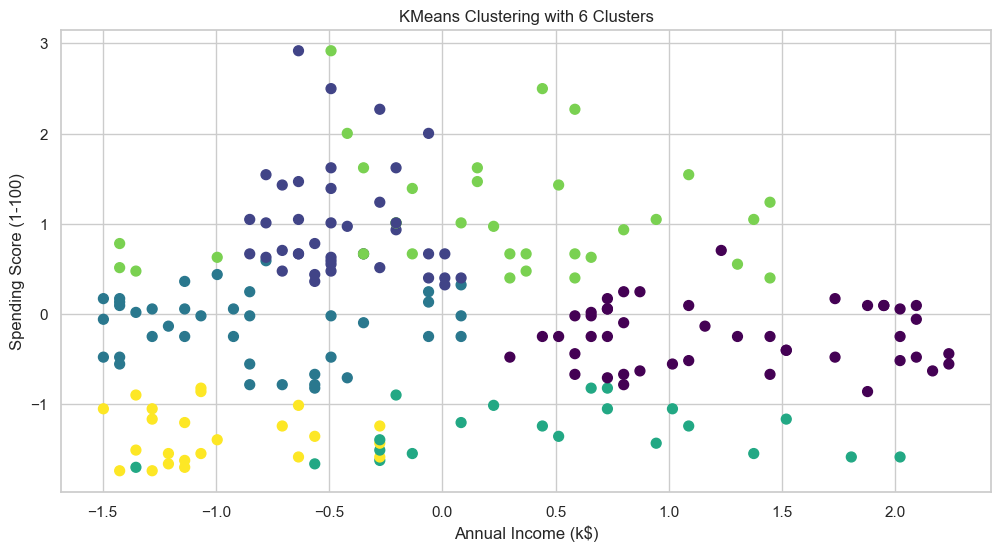

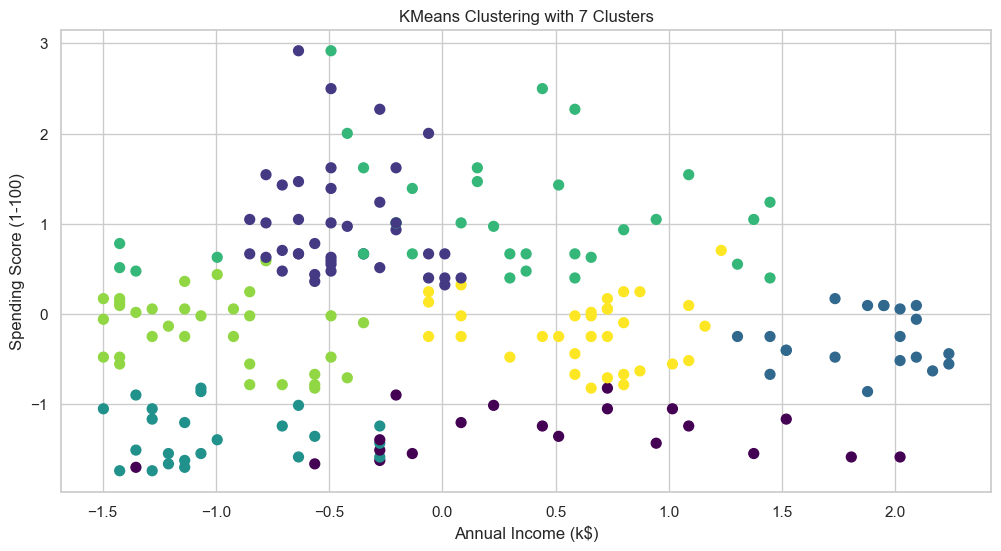

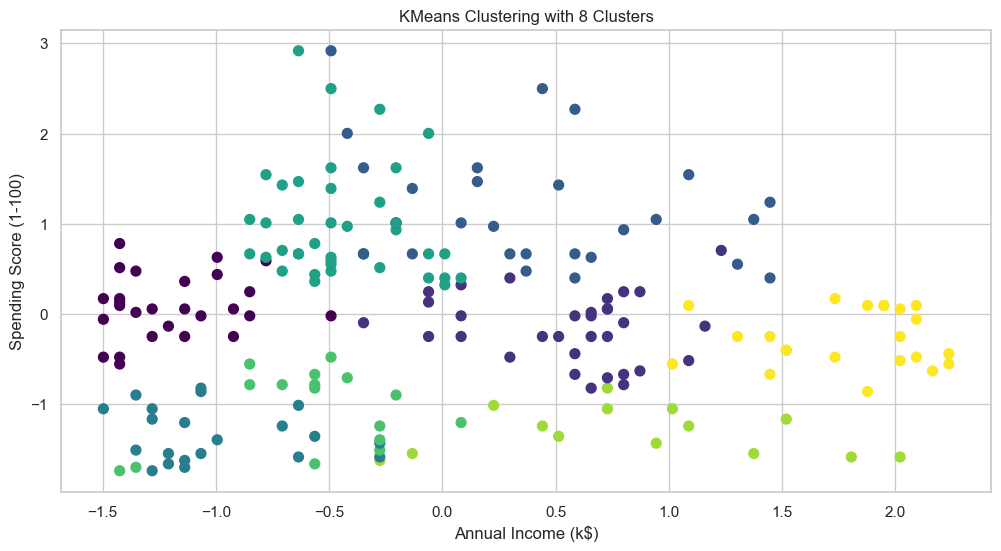

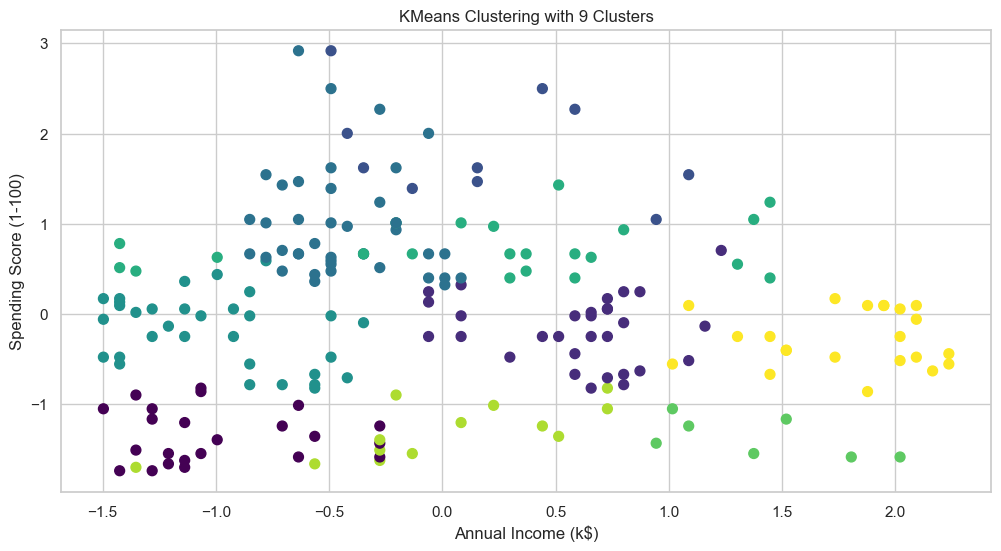

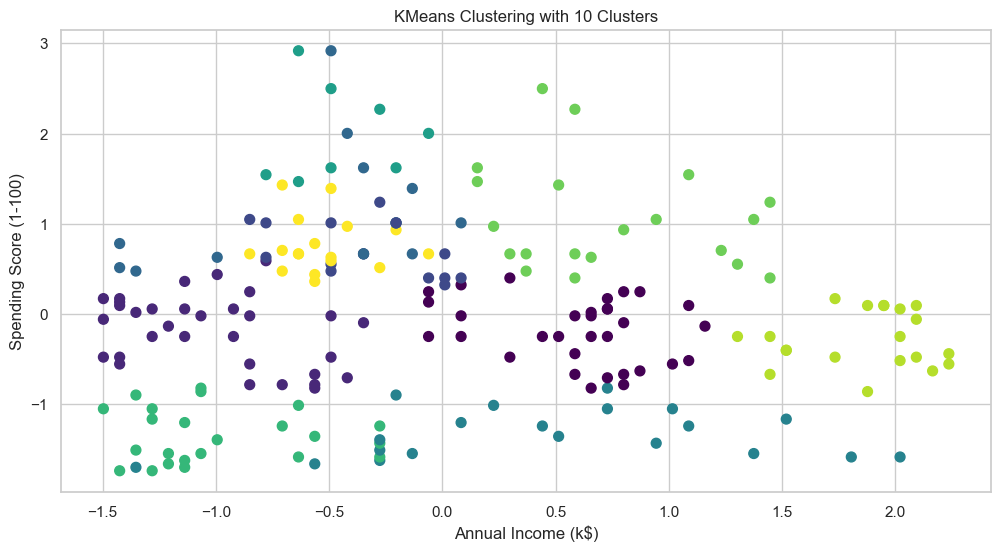

In [6]:
# plot the cluster for all the models
for model in kmeans_models:
    plt.figure(figsize=(12, 6))
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=model.labels_, cmap='viridis', s=50)
    plt.title(f'KMeans Clustering with {model.n_clusters} Clusters')
    plt.xlabel('Annual Income (k$)')
    plt.ylabel('Spending Score (1-100)')
    plt.show()


In [7]:
pro_data_mall

,Age,Annual Income (k$),Spending Score (1-100),Gender
0,-1.424569,-1.738999,-0.434801,1
1,-1.281035,-1.738999,1.195704,1
2,-1.352802,-1.700830,-1.715913,0
3,-1.137502,-1.700830,1.040418,0
4,-0.563369,-1.662660,-0.395980,0
...,...,...,...,...
195,-0.276302,2.268791,1.118061,0
196,0.441365,2.497807,-0.861839,0
197,-0.491602,2.497807,0.923953,1
198,-0.491602,2.917671,-1.250054,1


In [154]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score

import matplotlib.pyplot as plt

class KMeansExperiment:
    def __init__(self, train_data, eval_data=None, k_range=(2, 10), runs=1, random_state=None):
        self.train_data = train_data
        self.eval_data = eval_data
        self.k_range = k_range
        self.runs = runs
        self.random_state = random_state
        self.results = []

    def run(self):
        for k in range(self.k_range[0], self.k_range[1] + 1):
            for run_id in range(self.runs):
                seed = None if self.random_state is None else self.random_state + run_id
                # seed = None if self.random_state is None else self.random_state 

                # Train on train_data
                model = KMeans(n_clusters=k, random_state=seed)
                labels = model.fit_predict(self.train_data)
                self.results.append({
                    'k': k,
                    'run_id': run_id,
                    'random_seed': seed,
                    'dataset': 'train',
                    'inertia': model.inertia_,
                    'silhouette': silhouette_score(self.train_data, labels),
                    'calinski_harabasz': calinski_harabasz_score(self.train_data, labels)
                })
                # Evaluate on eval_data if provided
                if self.eval_data is not None:
                    eval_labels = model.predict(self.eval_data)
                    eval_centroids = model.cluster_centers_

                    inertia_eval = np.sum([
                    np.linalg.norm(self.eval_data.iloc[i] - eval_centroids[label])**2
                    for i, label in enumerate(eval_labels)
                ])


                  

                    self.results.append({
                        'k': k,
                        'run_id': run_id,
                        'random_seed': seed,
                        'dataset': 'eval',
                        'inertia': inertia_eval,  # Inertia not meaningful for eval
                        'silhouette': silhouette_score(self.eval_data, eval_labels),
                        'calinski_harabasz': calinski_harabasz_score(self.eval_data, eval_labels)
                    })

    def get_results(self):
        return pd.DataFrame(self.results)

    def plot_metrics(self, dataset='train'):
        df = self.get_results()
        df = df[df['dataset'] == dataset]
        metrics = ['inertia', 'silhouette', 'calinski_harabasz']
        plt.figure(figsize=(15, 4))
        for i, metric in enumerate(metrics):
            plt.subplot(1, 3, i+1)
            grouped = df.groupby('k')[metric].mean()
            plt.plot(grouped.index, grouped.values, marker='o')
            plt.title(f'{metric.capitalize()} vs k ({dataset})')
            plt.xlabel('k')
            plt.ylabel(metric.capitalize())
        plt.tight_layout()
        plt.show()

In [13]:
auto_data_test

,Age,Work_Experience,Family_Size,Gender,Ever_Married,Graduated,Profession,Spending_Score,Var_1
0,-0.450948,-0.792867,-1.196222,0,1,1,2,2,5
1,-0.391999,1.696957,0.767498,1,1,1,5,0,5
2,1.494372,-0.792867,-1.196222,0,1,0,0,2,5
3,0.904881,2.630641,-0.541649,1,1,0,4,1,5
4,-1.453083,-0.045920,0.767498,0,0,0,8,2,5
...,...,...,...,...,...,...,...,...,...
2622,-0.863592,2.008185,0.767498,1,0,0,5,2,5
2623,-0.509897,-0.481639,-1.196222,0,0,1,1,2,5
2624,0.551187,0.514290,-0.541649,0,0,1,3,2,5
2625,0.197492,-0.481639,1.422071,1,1,1,4,1,3


In [155]:
# Example usage
kmeans_experiment_1 = KMeansExperiment(
    train_data=pro_data_mall,
    # eval_data=auto_data_train,    
    k_range=(2, 10),
    runs=30,
    random_state=42
)
kmeans_experiment_1.run()
res_1 = kmeans_experiment_1.get_results()
res_1

,k,run_id,random_seed,dataset,inertia,silhouette,calinski_harabasz
0,2,0,42,train,438.522412,0.303198,95.160478
1,2,1,43,train,438.522412,0.303198,95.160478
2,2,2,44,train,438.522412,0.303198,95.160478
3,2,3,45,train,438.522412,0.303198,95.160478
4,2,4,46,train,438.522412,0.303198,95.160478
...,...,...,...,...,...,...,...
265,10,25,67,train,131.112698,0.312660,83.432709
266,10,26,68,train,130.061278,0.315650,84.277844
267,10,27,69,train,132.254654,0.338441,82.530022
268,10,28,70,train,129.749868,0.312462,84.530786


In [156]:
res_1.to_csv('kmeans_experiment_30run_9ks.csv', index=False)

| Metric                | Goal         | Explanation                                                                         |
| --------------------- | ------------ | ----------------------------------------------------------------------------------- |
| **Inertia**           | **Minimize** | Measures within-cluster sum-of-squares (compactness). Lower is better.              |
| **Silhouette**        | **Maximize** | Measures how similar an object is to its own cluster vs. others. Higher is better.  |
| **Calinski-Harabasz** | **Maximize** | Ratio of between-cluster dispersion to within-cluster dispersion. Higher is better. |


In [157]:
res_1_sum = res_1.drop(columns=["run_id"]).groupby(['k', 'dataset']).mean().reset_index()
res_1_sum

,k,dataset,random_seed,inertia,silhouette,calinski_harabasz
0,2,train,56.5,438.522412,0.303198,95.160478
1,3,train,56.5,344.528969,0.314124,87.127758
2,4,train,56.5,254.287651,0.350300,101.484153
3,5,train,56.5,216.787381,0.349796,97.256654
4,6,train,56.5,181.960617,0.356504,99.647903
5,7,train,56.5,165.051237,0.335065,94.375688
6,8,train,56.5,151.232317,0.332812,90.338045
7,9,train,56.5,140.495582,0.324669,86.471544
8,10,train,56.5,130.355119,0.323665,84.051251


In [158]:
res_1_sum \
    .style \
    .highlight_min(color='pink', subset=['inertia']) \
    .highlight_max(color='lightgreen', subset=['silhouette']) \
    .highlight_max(color='lightgreen', subset=['calinski_harabasz'])


,k,dataset,random_seed,inertia,silhouette,calinski_harabasz
0,2,train,56.500000,438.522412,0.303198,95.160478
1,3,train,56.500000,344.528969,0.314124,87.127758
2,4,train,56.500000,254.287651,0.350300,101.484153
3,5,train,56.500000,216.787381,0.349796,97.256654
4,6,train,56.500000,181.960617,0.356504,99.647903
5,7,train,56.500000,165.051237,0.335065,94.375688
6,8,train,56.500000,151.232317,0.332812,90.338045
7,9,train,56.500000,140.495582,0.324669,86.471544
8,10,train,56.500000,130.355119,0.323665,84.051251


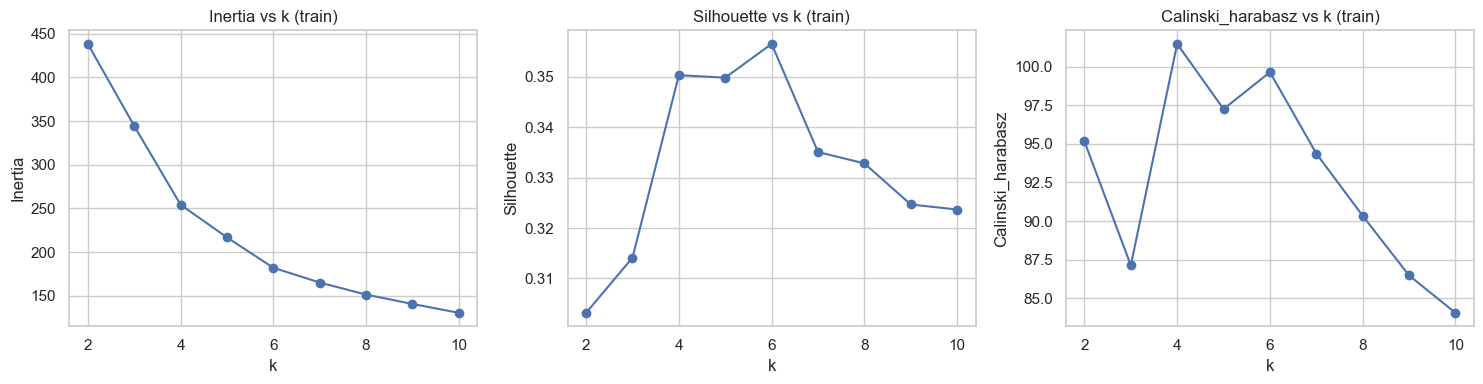

In [159]:
kmeans_experiment_1.plot_metrics(dataset='train')

In [160]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

metrics = ['inertia', 'silhouette', 'calinski_harabasz']
df_scaled = res_1_sum.copy()

# Inertia should be minimized, so we invert it after scaling
scaler = MinMaxScaler()

# Scale silhouette and Calinski-Harabasz (want to maximize)
df_scaled[['silhouette', 'calinski_harabasz']] = scaler.fit_transform(res_1_sum[['silhouette', 'calinski_harabasz']])

# Scale inertia (then invert to convert into a maximization metric)
df_scaled['inertia'] = 1 - scaler.fit_transform(res_1_sum[['inertia']])


In [161]:
df_scaled

,k,dataset,random_seed,inertia,silhouette,calinski_harabasz
0,2,train,56.5,0.000000,0.000000,0.637256
1,3,train,56.5,0.305008,0.204968,0.176477
2,4,train,56.5,0.597840,0.883618,1.000000
3,5,train,56.5,0.719528,0.874158,0.757499
4,6,train,56.5,0.832541,1.000000,0.894668
5,7,train,56.5,0.887411,0.597825,0.592239
6,8,train,56.5,0.932254,0.555559,0.360628
7,9,train,56.5,0.967094,0.402800,0.138835
8,10,train,56.5,1.000000,0.383953,0.000000


In [162]:
df_scaled['composite_score'] = (
    0.4 * df_scaled['inertia'] +
    0.2 * df_scaled['silhouette'] +
    0.4 * df_scaled['calinski_harabasz']
)
df_scaled.style.highlight_max(color='lightgreen', subset=['composite_score']) 

,k,dataset,random_seed,inertia,silhouette,calinski_harabasz,composite_score
0,2,train,56.500000,0.000000,0.000000,0.637256,0.254903
1,3,train,56.500000,0.305008,0.204968,0.176477,0.233587
2,4,train,56.500000,0.597840,0.883618,1.000000,0.815860
3,5,train,56.500000,0.719528,0.874158,0.757499,0.765642
4,6,train,56.500000,0.832541,1.000000,0.894668,0.890883
5,7,train,56.500000,0.887411,0.597825,0.592239,0.711425
6,8,train,56.500000,0.932254,0.555559,0.360628,0.628265
7,9,train,56.500000,0.967094,0.402800,0.138835,0.522932
8,10,train,56.500000,1.000000,0.383953,0.000000,0.476791


,k,inertia,silhouette,calinski_harabasz,composite_score
2,4,0.597840,0.883618,1.000000,0.815860
4,6,0.832541,1.000000,0.894668,0.890883
5,7,0.887411,0.597825,0.592239,0.711425
6,8,0.932254,0.555559,0.360628,0.628265
7,9,0.967094,0.402800,0.138835,0.522932
8,10,1.000000,0.383953,0.000000,0.476791


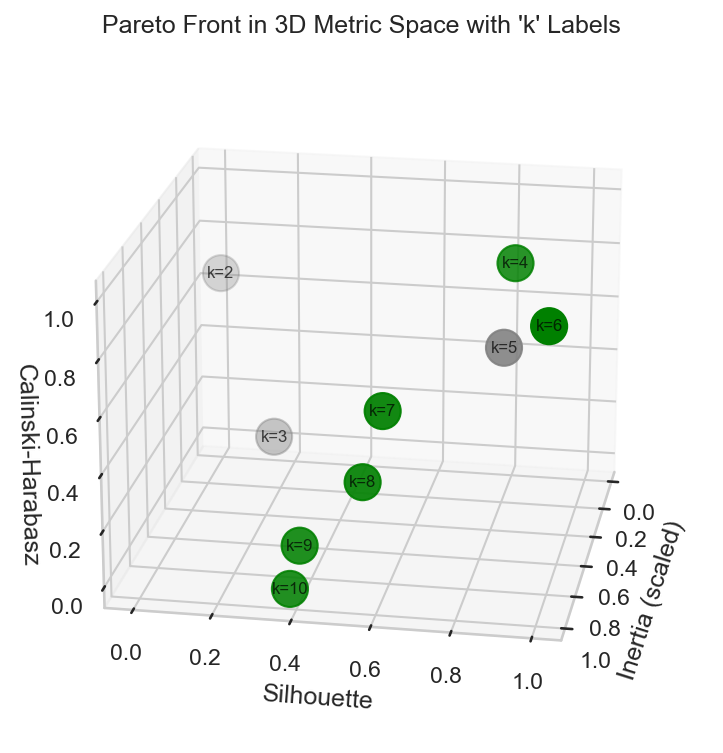

In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Copy the scaled dataframe
df = df_scaled.copy()

# Select metrics to include in Pareto optimization (assumed scaled)
metrics = ['inertia', 'silhouette', 'calinski_harabasz']
data = df[metrics].values

# Pareto front function
def is_pareto_efficient(data):
    is_efficient = np.ones(data.shape[0], dtype=bool)
    for i, point in enumerate(data):
        if is_efficient[i]:
            is_efficient[is_efficient] = np.any(data[is_efficient] > point, axis=1) | np.all(data[is_efficient] == point, axis=1)
            is_efficient[i] = True
    return is_efficient

# Apply Pareto front logic
df['pareto_optimal'] = is_pareto_efficient(data)

# Display Pareto-optimal rows
pareto_df = df[df['pareto_optimal']]
display(pareto_df[['k', 'inertia', 'silhouette', 'calinski_harabasz', 'composite_score']])

# # 3D Visualization
# fig = plt.figure(figsize=(6, 6), dpi=150)
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(df['inertia'], df['silhouette'], df['calinski_harabasz'],
#            c=df['pareto_optimal'].map({True: 'green', False: 'gray'}), s=50)
# ax.set_xlabel("Inertia (scaled)")
# ax.set_ylabel("Silhouette")
# ax.set_zlabel("Calinski-Harabasz")
# plt.title("Pareto Front in 3D Metric Space")
# plt.show()

# 3D Visualization with 'k' labels
fig = plt.figure(figsize=(6, 6), dpi=150)
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with color based on Pareto optimality
ax.scatter(df['inertia'], df['silhouette'], df['calinski_harabasz'],
           c=df['pareto_optimal'].map({True: 'green', False: 'gray'}), s=300)

# Add 'k' labels to each point
for _, row in df.iterrows():
    ax.text(row['inertia'], row['silhouette'], row['calinski_harabasz'],
            f"k={row['k']}", fontsize=8, alpha=0.7,
            color='black', ha='center', va='center')

# Axis labels and title
ax.view_init(elev=20, azim=10)
ax.set_xlabel("Inertia (scaled)")
ax.set_ylabel("Silhouette")
ax.set_zlabel("Calinski-Harabasz", labelpad=1)
plt.title("Pareto Front in 3D Metric Space with 'k' Labels")
plt.show()


In [164]:
pareto_df

,k,dataset,random_seed,inertia,silhouette,calinski_harabasz,composite_score,pareto_optimal
2,4,train,56.5,0.597840,0.883618,1.000000,0.815860,True
4,6,train,56.5,0.832541,1.000000,0.894668,0.890883,True
5,7,train,56.5,0.887411,0.597825,0.592239,0.711425,True
6,8,train,56.5,0.932254,0.555559,0.360628,0.628265,True
7,9,train,56.5,0.967094,0.402800,0.138835,0.522932,True
8,10,train,56.5,1.000000,0.383953,0.000000,0.476791,True


In [165]:
best = pareto_df.loc[pareto_df['composite_score'].idxmax()]
print(best)


k                           6
dataset                 train
random_seed              56.5
inertia              0.832541
silhouette                1.0
calinski_harabasz    0.894668
composite_score      0.890883
pareto_optimal           True
Name: 4, dtype: object


In [166]:
# # Example usage
# kmeans_experiment_1 = KMeansExperiment(
#     train_data=pro_data_mall,
#     # eval_data=auto_data_train,    
#     k_range=(2, 10),
#     runs=30,
#     random_state=42
# )
# kmeans_experiment_1.run()
# res_1 = kmeans_experiment_1.get_results()
# res_1

In [167]:
auto_data_train.columns

Index(['Age', 'Work_Experience', 'Family_Size', 'Gender', 'Ever_Married',
       'Graduated', 'Profession', 'Spending_Score', 'Var_1', 'Segmentation'],
      dtype='object')

In [168]:
kmeans_experiment_2 = KMeansExperiment(
    train_data= auto_data_train.drop(columns=['Segmentation']),
    eval_data=auto_data_test,
    k_range=(2, 10),
    runs=30,
    random_state=42
)
kmeans_experiment_2.run()
res_2 = kmeans_experiment_2.get_results()
res_2

,k,run_id,random_seed,dataset,inertia,silhouette,calinski_harabasz
0,2,0,42,train,63574.306199,0.342595,5154.901890
1,2,0,42,eval,20607.175656,0.351026,1758.619203
2,2,1,43,train,63574.306199,0.342595,5154.901890
3,2,1,43,eval,20607.175656,0.351026,1758.619203
4,2,2,44,train,63574.306199,0.342595,5154.901890
...,...,...,...,...,...,...,...
535,10,27,69,eval,9726.363790,0.233988,740.945422
536,10,28,70,train,29800.795262,0.235639,2235.366239
537,10,28,70,eval,9726.263354,0.233988,740.945422
538,10,29,71,train,29800.795262,0.235639,2235.366239


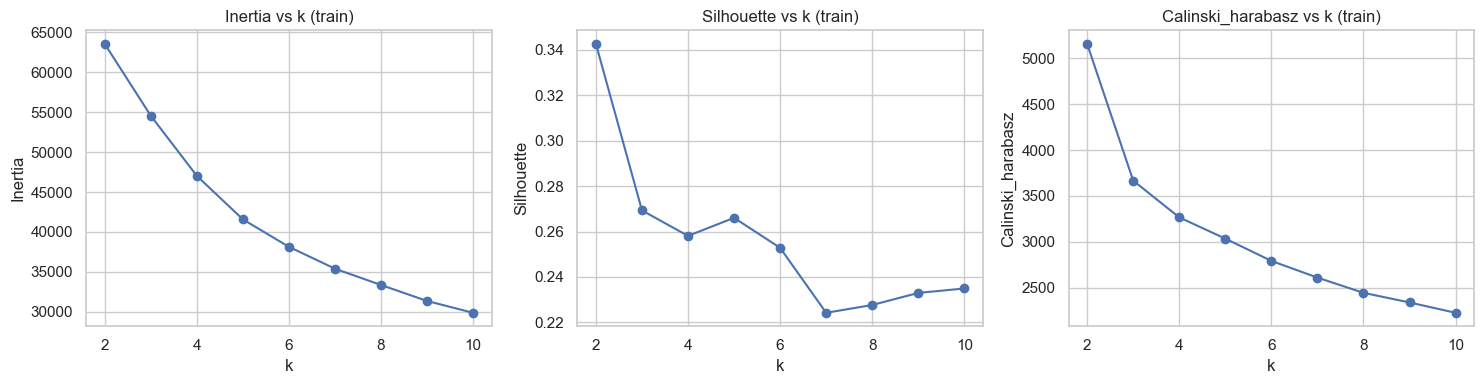

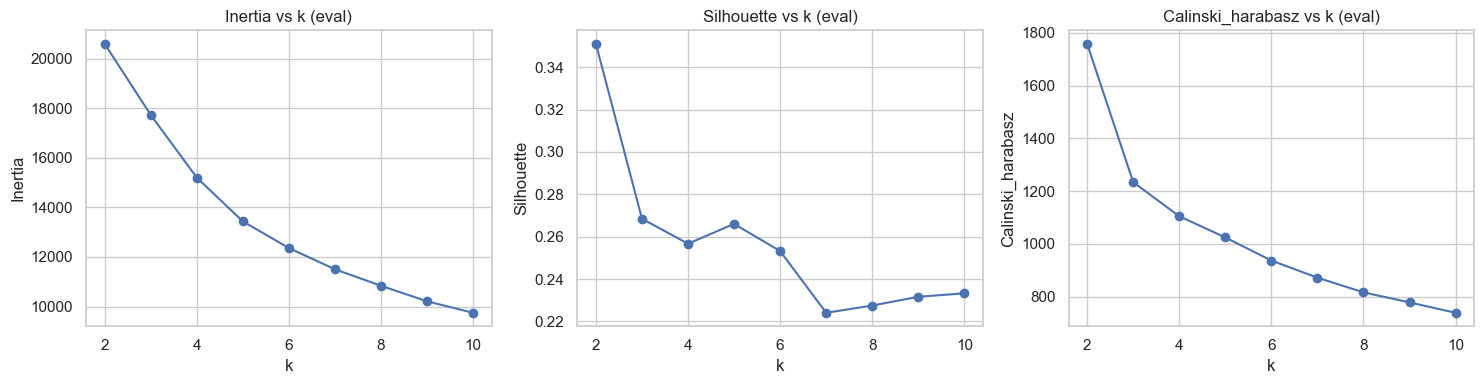

In [169]:
kmeans_experiment_2.plot_metrics(dataset='train')
kmeans_experiment_2.plot_metrics(dataset='eval')

In [170]:
res_2["inertia/samples"] = res_2.apply(
    lambda row: row["inertia"] / auto_data_train.shape[0] if row["dataset"] == "train" else row["inertia"] / auto_data_test.shape[0], 
    axis=1
)
res_2["calinski_harabasz/samples"] = res_2.apply(
    lambda row: row["calinski_harabasz"] / auto_data_train.shape[0] if row["dataset"] == "train" else row["calinski_harabasz"] / auto_data_test.shape[0], 
    axis=1
)
res_2["silhouette/samples"] = res_2.apply(
    lambda row: row["silhouette"] / auto_data_train.shape[0] if row["dataset"] == "train" else row["silhouette"] / auto_data_test.shape[0], 
    axis=1
)
res_2 

,k,run_id,random_seed,dataset,inertia,silhouette,calinski_harabasz,inertia/samples,calinski_harabasz/samples,silhouette/samples
0,2,0,42,train,63574.306199,0.342595,5154.901890,7.879810,0.638932,0.000042
1,2,0,42,eval,20607.175656,0.351026,1758.619203,7.844376,0.669440,0.000134
2,2,1,43,train,63574.306199,0.342595,5154.901890,7.879810,0.638932,0.000042
3,2,1,43,eval,20607.175656,0.351026,1758.619203,7.844376,0.669440,0.000134
4,2,2,44,train,63574.306199,0.342595,5154.901890,7.879810,0.638932,0.000042
...,...,...,...,...,...,...,...,...,...,...
535,10,27,69,eval,9726.363790,0.233988,740.945422,3.702461,0.282050,0.000089
536,10,28,70,train,29800.795262,0.235639,2235.366239,3.693703,0.277066,0.000029
537,10,28,70,eval,9726.263354,0.233988,740.945422,3.702422,0.282050,0.000089
538,10,29,71,train,29800.795262,0.235639,2235.366239,3.693703,0.277066,0.000029


In [171]:
res_2.to_csv('kmeans_experiment_30run_9ks_cust.csv', index=False)

In [172]:
# res_2_sum = res_2.drop(columns=["run_id"]).groupby(['k', 'dataset']).mean().reset_index()
# res_2_sum

res_2_train = res_2[res_2["dataset"]=="train"].drop(columns=["run_id"]).groupby(['k', 'dataset']).mean().reset_index()
res_2_train

,k,dataset,random_seed,inertia,silhouette,calinski_harabasz,inertia/samples,calinski_harabasz/samples,silhouette/samples
0,2,train,56.5,63574.310740,0.342595,5154.901725,7.879810,0.638932,0.000042
1,3,train,56.5,54576.097378,0.269300,3666.902622,6.764514,0.454500,0.000033
2,4,train,56.5,47037.097410,0.258088,3266.887965,5.830081,0.404919,0.000032
3,5,train,56.5,41580.225006,0.266051,3035.972158,5.153721,0.376298,0.000033
4,6,train,56.5,38136.804511,0.252834,2793.308978,4.726922,0.346221,0.000031
5,7,train,56.5,35396.065052,0.224243,2611.690425,4.387217,0.323710,0.000028
6,8,train,56.5,33352.670983,0.227680,2446.009483,4.133945,0.303174,0.000028
7,9,train,56.5,31349.114303,0.233000,2341.147911,3.885612,0.290177,0.000029
8,10,train,56.5,29865.619310,0.234946,2228.644980,3.701738,0.276233,0.000029


In [173]:
res_2_eval = res_2[res_2["dataset"]=="eval"].drop(columns=["run_id"]).groupby(['k', 'dataset']).mean().reset_index()
res_2_eval

,k,dataset,random_seed,inertia,silhouette,calinski_harabasz,inertia/samples,calinski_harabasz/samples,silhouette/samples
0,2,eval,56.5,20607.158919,0.351026,1758.619203,7.844370,0.669440,0.000134
1,3,eval,56.5,17737.352844,0.268475,1234.161366,6.751942,0.469799,0.000102
2,4,eval,56.5,15204.872752,0.256680,1105.058671,5.787923,0.420654,0.000098
3,5,eval,56.5,13439.135698,0.266038,1024.589678,5.115773,0.390023,0.000101
4,6,eval,56.5,12361.384580,0.253218,937.066016,4.705514,0.356706,0.000096
5,7,eval,56.5,11503.601156,0.224066,872.104466,4.378988,0.331977,0.000085
6,8,eval,56.5,10836.871073,0.227492,816.370754,4.125189,0.310762,0.000087
7,9,eval,56.5,10210.481635,0.231625,778.355430,3.886746,0.296291,0.000088
8,10,eval,56.5,9745.783729,0.233267,738.907434,3.709853,0.281274,0.000089


In [174]:
res_2_train.iloc[:, :6] \
    .style \
    .highlight_min(color='pink', subset=['inertia']) \
    .highlight_max(color='lightgreen', subset=['silhouette']) \
    .highlight_max(color='lightgreen', subset=['calinski_harabasz'])


,k,dataset,random_seed,inertia,silhouette,calinski_harabasz
0,2,train,56.500000,63574.310740,0.342595,5154.901725
1,3,train,56.500000,54576.097378,0.269300,3666.902622
2,4,train,56.500000,47037.097410,0.258088,3266.887965
3,5,train,56.500000,41580.225006,0.266051,3035.972158
4,6,train,56.500000,38136.804511,0.252834,2793.308978
5,7,train,56.500000,35396.065052,0.224243,2611.690425
6,8,train,56.500000,33352.670983,0.227680,2446.009483
7,9,train,56.500000,31349.114303,0.233000,2341.147911
8,10,train,56.500000,29865.619310,0.234946,2228.644980


In [175]:
res_2_eval.iloc[:, :6] \
    .style \
    .highlight_min(color='pink', subset=['inertia']) \
    .highlight_max(color='lightgreen', subset=['silhouette']) \
    .highlight_max(color='lightgreen', subset=['calinski_harabasz'])


,k,dataset,random_seed,inertia,silhouette,calinski_harabasz
0,2,eval,56.500000,20607.158919,0.351026,1758.619203
1,3,eval,56.500000,17737.352844,0.268475,1234.161366
2,4,eval,56.500000,15204.872752,0.256680,1105.058671
3,5,eval,56.500000,13439.135698,0.266038,1024.589678
4,6,eval,56.500000,12361.384580,0.253218,937.066016
5,7,eval,56.500000,11503.601156,0.224066,872.104466
6,8,eval,56.500000,10836.871073,0.227492,816.370754
7,9,eval,56.500000,10210.481635,0.231625,778.355430
8,10,eval,56.500000,9745.783729,0.233267,738.907434


In [176]:
res_2_train.columns


Index(['k', 'dataset', 'random_seed', 'inertia', 'silhouette',
       'calinski_harabasz', 'inertia/samples', 'calinski_harabasz/samples',
       'silhouette/samples'],
      dtype='object')

In [177]:
res_2_train.drop(columns=['inertia', 'silhouette','calinski_harabasz']) \
    .style \
    .highlight_min(color='pink', subset=['inertia/samples']) \
    .highlight_max(color='lightgreen', subset=['silhouette/samples']) \
    .highlight_max(color='lightgreen', subset=['calinski_harabasz/samples'])


,k,dataset,random_seed,inertia/samples,calinski_harabasz/samples,silhouette/samples
0,2,train,56.500000,7.879810,0.638932,0.000042
1,3,train,56.500000,6.764514,0.454500,0.000033
2,4,train,56.500000,5.830081,0.404919,0.000032
3,5,train,56.500000,5.153721,0.376298,0.000033
4,6,train,56.500000,4.726922,0.346221,0.000031
5,7,train,56.500000,4.387217,0.323710,0.000028
6,8,train,56.500000,4.133945,0.303174,0.000028
7,9,train,56.500000,3.885612,0.290177,0.000029
8,10,train,56.500000,3.701738,0.276233,0.000029


In [178]:
res_2_eval.drop(columns=['inertia', 'silhouette','calinski_harabasz']) \
    .style \
    .highlight_min(color='pink', subset=['inertia/samples']) \
    .highlight_max(color='lightgreen', subset=['silhouette/samples']) \
    .highlight_max(color='lightgreen', subset=['calinski_harabasz/samples'])


,k,dataset,random_seed,inertia/samples,calinski_harabasz/samples,silhouette/samples
0,2,eval,56.500000,7.844370,0.669440,0.000134
1,3,eval,56.500000,6.751942,0.469799,0.000102
2,4,eval,56.500000,5.787923,0.420654,0.000098
3,5,eval,56.500000,5.115773,0.390023,0.000101
4,6,eval,56.500000,4.705514,0.356706,0.000096
5,7,eval,56.500000,4.378988,0.331977,0.000085
6,8,eval,56.500000,4.125189,0.310762,0.000087
7,9,eval,56.500000,3.886746,0.296291,0.000088
8,10,eval,56.500000,3.709853,0.281274,0.000089


In [179]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

metrics = ['inertia', 'silhouette', 'calinski_harabasz']
df_scaled_2 = res_2_train.copy()

# Inertia should be minimized, so we invert it after scaling
scaler = MinMaxScaler()

# Scale silhouette and Calinski-Harabasz (want to maximize)
df_scaled_2[['silhouette', 'calinski_harabasz']] = scaler.fit_transform(res_2_train[['silhouette', 'calinski_harabasz']])

# Scale inertia (then invert to convert into a maximization metric)
df_scaled_2['inertia'] = 1 - scaler.fit_transform(res_2_train[['inertia']])

df_scaled_2['composite_score'] = (
    0.4 * df_scaled_2['inertia'] +
    0.2 * df_scaled_2['silhouette'] +
    0.4 * df_scaled_2['calinski_harabasz']
)
df_scaled_2.style.highlight_max(color='lightgreen', subset=['composite_score']) 



,k,dataset,random_seed,inertia,silhouette,calinski_harabasz,inertia/samples,calinski_harabasz/samples,silhouette/samples,composite_score
0,2,train,56.500000,-0.000000,1.000000,1.000000,7.879810,0.638932,0.000042,0.600000
1,3,train,56.500000,0.266940,0.380703,0.491501,6.764514,0.454500,0.000033,0.379517
2,4,train,56.500000,0.490592,0.285966,0.354802,5.830081,0.404919,0.000032,0.395351
3,5,train,56.500000,0.652475,0.353252,0.275891,5.153721,0.376298,0.000033,0.441997
4,6,train,56.500000,0.754628,0.241579,0.192965,4.726922,0.346221,0.000031,0.427353
5,7,train,56.500000,0.835934,0.000000,0.130899,4.387217,0.323710,0.000028,0.386733
6,8,train,56.500000,0.896553,0.029039,0.074281,4.133945,0.303174,0.000028,0.394141
7,9,train,56.500000,0.955991,0.073988,0.038446,3.885612,0.290177,0.000029,0.412572
8,10,train,56.500000,1.000000,0.090430,0.000000,3.701738,0.276233,0.000029,0.418086


In [180]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

metrics = ['inertia', 'silhouette', 'calinski_harabasz']
df_scaled_3 = res_2_eval.copy()

# Inertia should be minimized, so we invert it after scaling
scaler = MinMaxScaler()

# Scale silhouette and Calinski-Harabasz (want to maximize)
df_scaled_3[['silhouette', 'calinski_harabasz']] = scaler.fit_transform(res_2_eval[['silhouette', 'calinski_harabasz']])

# Scale inertia (then invert to convert into a maximization metric)
df_scaled_3['inertia'] = 1 - scaler.fit_transform(res_2_eval[['inertia']])

df_scaled_3['composite_score'] = (
    0.4 * df_scaled_3['inertia'] +
    0.2 * df_scaled_3['silhouette'] +
    0.4 * df_scaled_3['calinski_harabasz']
)
df_scaled_3.style.highlight_max(color='lightgreen', subset=['composite_score']) 



,k,dataset,random_seed,inertia,silhouette,calinski_harabasz,inertia/samples,calinski_harabasz/samples,silhouette/samples,composite_score
0,2,eval,56.500000,0.000000,1.000000,1.000000,7.844370,0.669440,0.000134,0.600000
1,3,eval,56.500000,0.264221,0.349786,0.485680,6.751942,0.469799,0.000102,0.369918
2,4,eval,56.500000,0.497385,0.256882,0.359073,5.787923,0.420654,0.000098,0.393960
3,5,eval,56.500000,0.659955,0.330593,0.280160,5.115773,0.390023,0.000101,0.442165
4,6,eval,56.500000,0.759183,0.229619,0.194328,4.705514,0.356706,0.000096,0.427328
5,7,eval,56.500000,0.838159,0.000000,0.130622,4.378988,0.331977,0.000085,0.387512
6,8,eval,56.500000,0.899544,0.026982,0.075966,4.125189,0.310762,0.000087,0.395600
7,9,eval,56.500000,0.957216,0.059537,0.038685,3.886746,0.296291,0.000088,0.410268
8,10,eval,56.500000,1.000000,0.072472,0.000000,3.709853,0.281274,0.000089,0.414494
